# INM427 Neural Computing Final Coursework

## By Ho Yin Tam

Import the library.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")

Import the heart disease dataset.

In [27]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Check the data types.

In [28]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Check if there is any missing data.

In [29]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Create histograms for the columns containing numerical values. And create bar charts for the columns containing categorical values.

In [30]:
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
numeric_columns

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [31]:
categorical_columns = ['Sex',
                     'ChestPainType',
                     'FastingBS',
                     'RestingECG',
                     'ExerciseAngina',
                     'ST_Slope']
categorical_columns

['Sex',
 'ChestPainType',
 'FastingBS',
 'RestingECG',
 'ExerciseAngina',
 'ST_Slope']

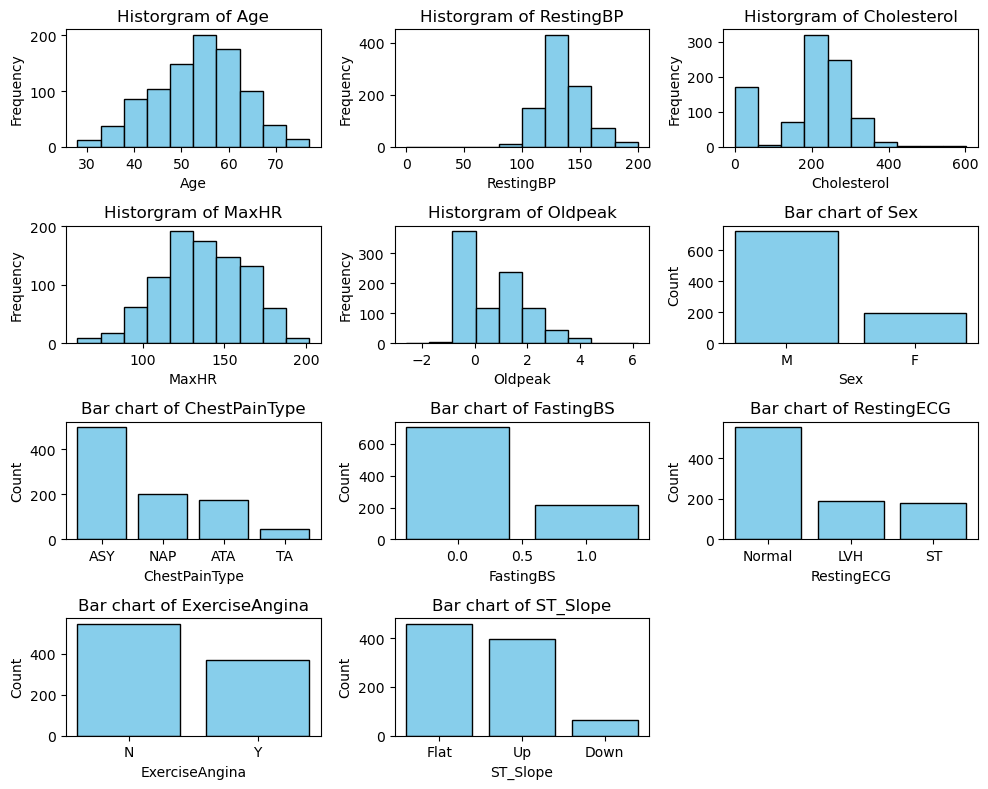

In [32]:
# Create a figure with 11 subplots (5 histograms and 6 bar charts)
fig, axes = plt.subplots(4, 3, figsize = (10, 8))
axes = axes.flatten()

# Visualize the histogram containing numerical values
for i, column in enumerate(numeric_columns):
    axes[i].hist(heart[column], bins = 10, color = 'skyblue', edgecolor = 'black')
    axes[i].set_title(f'Historgram of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Frequency')
    
# Visualize the bar chart containing categorical values 
for i, column in enumerate(categorical_columns):
    axes[i + len(numeric_columns)].bar(heart[column].value_counts().index, 
                                       heart[column].value_counts().values, color = 'skyblue', edgecolor = 'black')
    axes[i + len(numeric_columns)].set_title(f'Bar chart of {column}')
    axes[i + len(numeric_columns)].set_xlabel(f'{column}')
    axes[i + len(numeric_columns)].set_ylabel('Count')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

Having 0 resting BP and cholesterol are classified as anonmalous data so they will be removed.

In [33]:
print('Number of obervations having 0 RestingBP:', (heart['RestingBP'] == 0).sum())
print('Number of obervations having 0 cholesterol:', (heart['Cholesterol'] == 0).sum())
print('Number of obervations having 0 RestingBP and cholesterol:', ((heart['Cholesterol'] == 0) & (heart['RestingBP'] == 0)).sum())

Number of obervations having 0 RestingBP: 1
Number of obervations having 0 cholesterol: 172
Number of obervations having 0 RestingBP and cholesterol: 1


In [34]:
heart_removed = heart.loc[(heart['Cholesterol'] != 0) & (heart['RestingBP'] != 0)]
heart_removed['HeartDisease'] = heart_removed['HeartDisease'].replace({0: 'Normal', 1: 'Heart Disease'}) 
heart_removed

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,Normal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,Heart Disease
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,Normal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,Heart Disease
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,Heart Disease
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,Heart Disease
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,Heart Disease
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,Heart Disease


Using the heart_removed dataset, create a pie chart showing the percentage of heart disease or normal.

(array(['Heart Disease', 'Normal'], dtype=object), array([356, 390], dtype=int64))
Percentage of heart disease: 47.72117962466488
Percentage of normal: 52.27882037533512


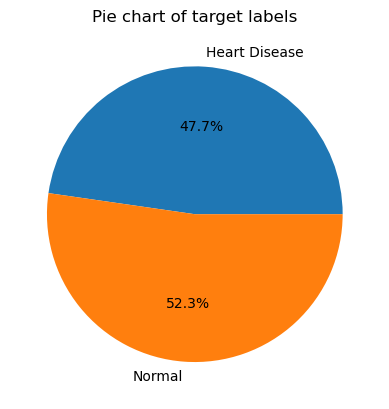

In [35]:
# Count the occurance of the value in the Heart Disease column
heart_removed_target = np.unique(heart_removed['HeartDisease'], return_counts = True)
print(heart_removed_target)

# Calculate the percentage
heart_removed_disease_normal = heart_removed_target[1]

heart_removed_total = len(heart_removed['HeartDisease'])
heart_disease_percentage = (heart_removed_disease_normal[0] / heart_removed_total) * 100
normal_percentage = (heart_removed_disease_normal[1] / heart_removed_total) * 100

print('Percentage of heart disease:', heart_disease_percentage)
print('Percentage of normal:', normal_percentage)

# Create a pie chart
plt.pie(heart_removed_target[1], labels = heart_removed_target[0], autopct = '%1.1f%%')
plt.title('Pie chart of target labels')
plt.show()

Using the heart_removed dataset, create histograms for the columns containing numerical values. And create bar charts for the columns containing categorical values.

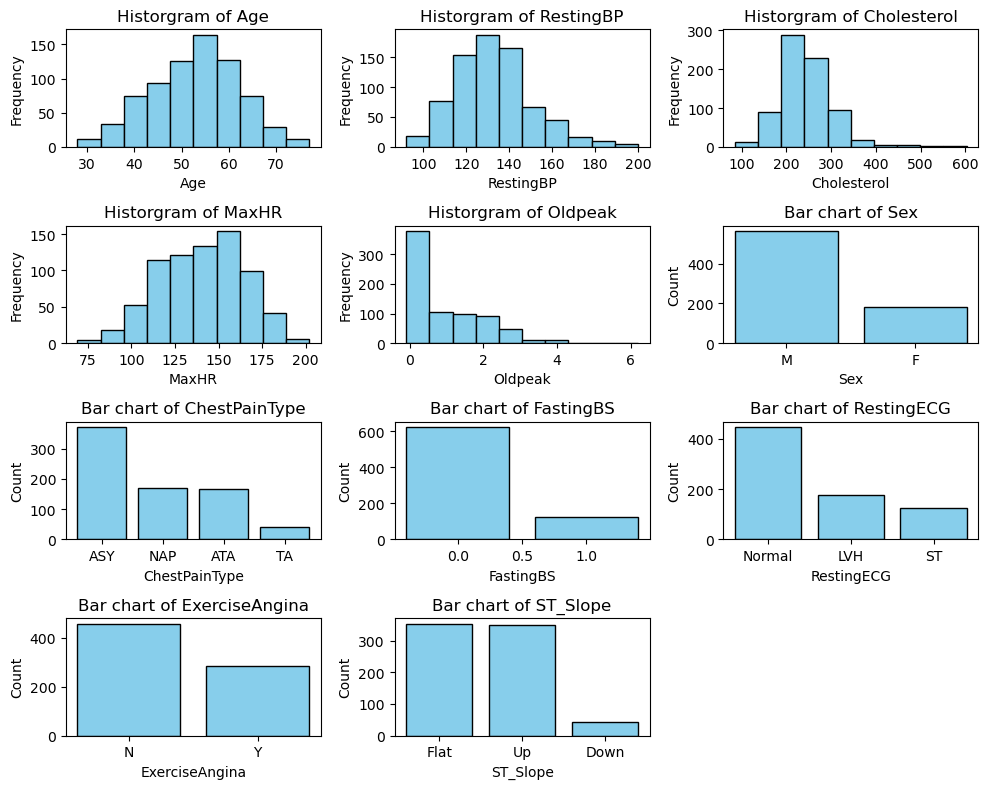

In [36]:
# Create a figure with 11 subplots (5 histograms and 6 bar charts)
fig, axes = plt.subplots(4, 3, figsize = (10, 8))
axes = axes.flatten()

# Visualize the histogram containing numerical values
for i, column in enumerate(numeric_columns):
    axes[i].hist(heart_removed[column], bins = 10, color = 'skyblue', edgecolor = 'black')
    axes[i].set_title(f'Historgram of {column}')
    axes[i].set_xlabel(f'{column}')
    axes[i].set_ylabel('Frequency')
    
# Visualize the bar chart containing categorical values 
for i, column in enumerate(categorical_columns):
    axes[i + len(numeric_columns)].bar(heart_removed[column].value_counts().index, 
                                       heart_removed[column].value_counts().values, color = 'skyblue', edgecolor = 'black')
    axes[i + len(numeric_columns)].set_title(f'Bar chart of {column}')
    axes[i + len(numeric_columns)].set_xlabel(f'{column}')
    axes[i + len(numeric_columns)].set_ylabel('Count')

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

In [37]:
# Summary statistics
heart_removed.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,746.0,52.882038,9.505888,28.0,46.00,54.0,59.0,77.0
RestingBP,746.0,133.022788,17.282750,92.0,120.00,130.0,140.0,200.0
Cholesterol,746.0,244.635389,59.153524,85.0,207.25,237.0,275.0,603.0
FastingBS,746.0,0.167560,0.373726,0.0,0.00,0.0,0.0,1.0
MaxHR,746.0,140.226542,24.524107,69.0,122.00,140.0,160.0,202.0
Oldpeak,746.0,0.901609,1.072861,-0.1,0.00,0.5,1.5,6.2


Encode the data.

In [38]:
# Encode the normal as 0 and the heart disease as 1
heart_removed['HeartDisease'] = heart_removed['HeartDisease'].replace({'Normal': 0, 'Heart Disease': 1}) 

# Create a copy of the dataframe for encoding
heart_encoded = heart_removed.copy()

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Encode
heart_encoded[categorical_columns] = encoder.fit_transform(heart_removed[categorical_columns])

# Display the encoded dataframe
heart_encoded

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0.0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0.0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0.0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0.0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0.0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0.0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1.0,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0.0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0.0,0.0,174,0.0,0.0,1.0,1


Now standardize the data.

In [39]:
# Create a copy of the dataframe for standardization
heart_clean = heart_encoded.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
heart_clean[numeric_columns] = scaler.fit_transform(heart_encoded[numeric_columns])

heart_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.356073,1.0,1.0,0.403980,0.750494,0.0,1.0,1.296470,0.0,-0.840942,2.0,0
1,-0.408656,0.0,2.0,1.561980,-1.093405,0.0,1.0,0.643613,0.0,0.091771,1.0,1
2,-1.671879,1.0,1.0,-0.175019,0.648995,0.0,2.0,-1.722993,0.0,-0.840942,2.0,0
3,-0.513925,0.0,0.0,0.288180,-0.518244,0.0,1.0,-1.314958,1.0,0.558127,1.0,1
4,0.117686,1.0,2.0,0.982980,-0.839657,0.0,1.0,-0.743708,0.0,-0.840942,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.829731,1.0,3.0,-1.333019,0.327582,0.0,1.0,-0.335672,0.0,0.278313,1.0,1
914,1.591446,1.0,0.0,0.635580,-0.873490,1.0,1.0,0.031560,0.0,2.330281,1.0,1
915,0.433492,1.0,0.0,-0.175019,-1.922314,0.0,1.0,-1.029333,1.0,0.278313,1.0,1
916,0.433492,0.0,1.0,-0.175019,-0.146081,0.0,0.0,1.378077,0.0,-0.840942,1.0,1


Visualize heatmap.

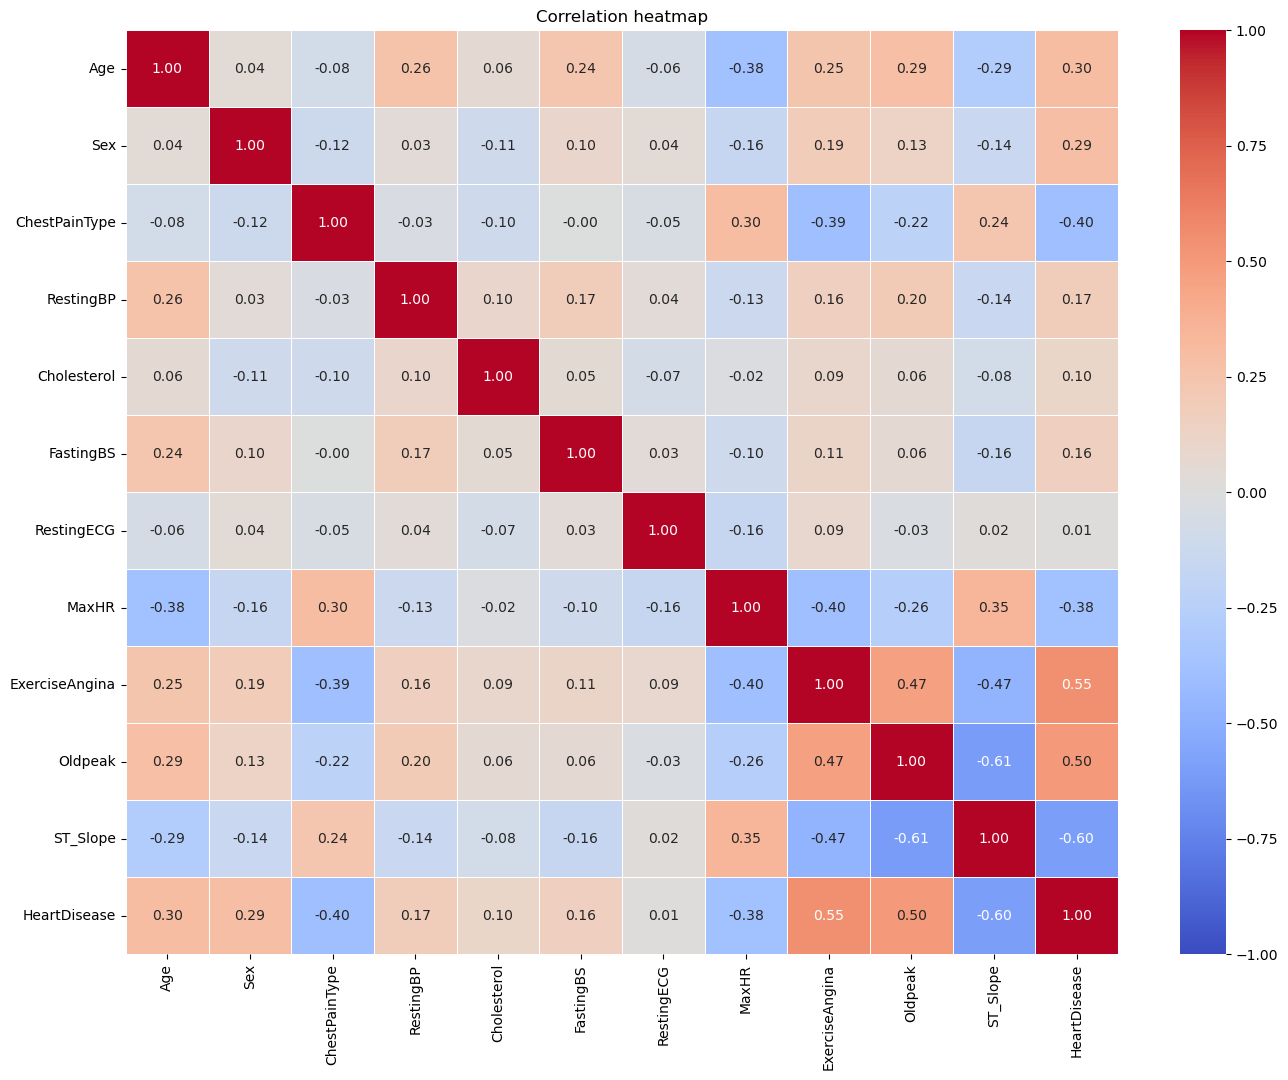

In [40]:
# Correlation matrix
cm = heart_clean.corr()

# Create a heatmap
plt.figure(figsize = (16, 12))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5, vmin = -1, vmax = 1)
plt.title('Correlation heatmap')
plt.show()

Split the data into features and label and then further split the data into 80% of training data and 20% test data. Random state is set to ensure the reproducibility of the results of the training data and test data splitting.

In [41]:
# Features
X = heart_clean.drop('HeartDisease', axis = 1)
# Label
y = heart_clean['HeartDisease']
# Split the data into 80% of training data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Save the training data and test data into csv file.

In [42]:
X_train.to_csv('X_train.csv', index = False)
y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_test.to_csv('y_test.csv', index = False)